# Search for scientific processes

## Introduction

Here we demonstrate how to search for events of specific scientific processes using the **Event Search** subpackage included in **AIDApy**. First, we start with importing the modules required by **Event Search**:

In [1]:
#Python modules
from datetime import datetime
import numpy as np

#AIDApy modules
from aidapy import event_search

## Looking for specific EDR events
In particular, here we want to look for Electron Diffusion Regions, which are tiny regions located at the very center of magnetic reconnection. To do so, we chose to use data from the MMS mission, which has been specifically designed to study the microphysics (down to electron scales) of magnetic reconnection. We also chose to look at data on 2017 July 20, during which a specific campaign was dedicated to the observation of reconnection in the magnetotail. The time interval is thus defined as: 

In [2]:
start_time = datetime(2017, 8, 20, 2, 0, 0)
end_time = datetime(2017, 8, 20, 2, 10, 0)

Then, we need to set up the settings for the specific scientific process we want to study; i. e., here Electron Diffusion Region (EDR). The EDR is characterized by a very low magnetic field (< 5 nT), high-speed electron jets (> 4000 km/s) and a high currents (current density > 70 nA/m²). Thus we define these criteria as inputs to the Event Search tool, in a format compliant with the *event_search* function (see the Event Search section in the user guide). Additionally, we chose to download data from all probes on board MMS mission, in the default GSE coordinate system. Finally, since the EDR region size is of electron scale, we chose to use the high-resolution burst-mode data from MMS, and a time window of 60 s.

In [3]:
settings = {"criteria": lambda dc_mag_tot, j_curl_tot, e_bulkv_x: (np.any(dc_mag_tot < 5)) &
            (np.any(j_curl_tot > 70)) & (np.any(np.abs(e_bulkv_x) > 4000)),
            "parameters": {"mission": "mms",
                           "process": "edr",
                           "probes": ['1'],
                           "mode": "brst",
                           "time_window": 120,
                           "time_step": 120}}

Once the settings on the data and parameters are defined, we call *event_search* function as follows:

/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('hours') for key 'mms1_mec_mlt' are unknown
  warnings.warn(message)
/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('0, 1') for key 'mms1_des_compressionloss_brst' are unknown
  warnings.warn(message)
/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('0, 1') for key 'mms1_des_steptable_parity_brst' are unknown
  warnings.warn(message)
/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF provided units ('00-32') for key 'mms1_des_sector_despinp_brst' are unknown
  warnings.warn(message)
/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/heliopy/data/util.py:577: UserWarning: The CDF p

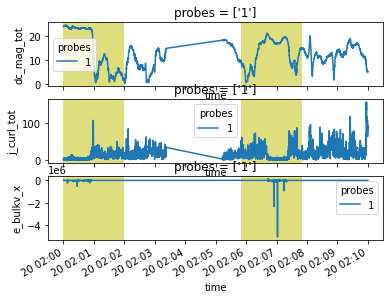

In [4]:
data, events = event_search(settings, start_time, end_time, plot=True)

In [5]:
print(data)

<xarray.Dataset>
Dimensions:     (probes: 1, time: 16333)
Coordinates:
  * time        (time) datetime64[ns] 2017-08-20T02:00:00.014463 ... 2017-08-...
  * probes      (probes) <U1 '1'
Data variables:
    dc_mag_tot  (time, probes) float64 24.09 24.1 24.1 ... 5.036 5.065 5.072
    j_curl_tot  (time, probes) float64 3.93 1.68 3.411 ... 83.73 81.91 80.34
    e_bulkv_x   (time, probes) float64 0.0 -5.567e+03 0.0 ... -667.1 -748.2


As seen above, the function gives as ouput an overview plot with highlighted events for the user to eyeball the results, but if ``to_file`` parameter set to ``True``, also writes a simple text file with the events selected, as follows:

In [6]:
#events_list.txt

'''
List of events found:

N°,       START TIME (UTC),              END TIME (UTC),                        S/C location (km)
1, 2017-08-10T12:18:01.728287000, 2017-08-10T12:19:01.208817000          -96743.35/16839.555/30637.818
''';

## Looking for Dipolarization Front (DF) events

In [7]:
# Time interval
start_time = datetime(2003, 8, 29, 13, 0, 0)
end_time = datetime(2003, 8, 29, 15, 0, 0)

In [8]:
# Input criteria for DF events
settings = {
    
    "criteria": lambda sc_pos_x, sc_pos_y, dc_mag_z, mag_elangle:
    (np.all(sc_pos_x <= -5 * 6378)) & (np.all(np.abs(sc_pos_y) <= 15 * 6378)) &
    (np.abs(mag_elangle[np.where(dc_mag_z == np.min(dc_mag_z))[0]] - mag_elangle[np.where(dc_mag_z == np.max(dc_mag_z))[0]]) > 10) &
    (np.where(dc_mag_z == np.max(dc_mag_z))[0] > np.where(dc_mag_z == np.min(dc_mag_z))[0]) &
    (np.any(mag_elangle > 45)),
    
    "parameters": {"mission": "cluster",
                   "process": "df",
                   "probes": ['1'],
                   "time_window": 180,
                   "coords": "gse",
                   "mode": 'low_res',
                   "time_step": 180,
                   "sample_freq": 1}}

/home/rdupuis/miniconda3/envs/notebooks_aidapy/lib/python3.7/site-packages/xarray/core/common.py:1124: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  freq=freq, closed=closed, label=label, base=base, loffset=loffset


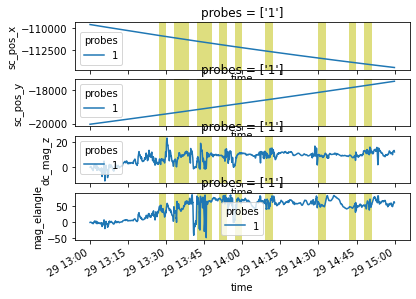

In [9]:
# Call Event Search subpackage
data, events = event_search(settings, start_time, end_time, plot=True)

In [10]:
print(data)

<xarray.Dataset>
Dimensions:      (probes: 1, time: 7197)
Coordinates:
  * time         (time) datetime64[ns] 2003-08-29T13:00:00 ... 2003-08-29T14:...
  * probes       (probes) <U1 '1'
Data variables:
    sc_pos_x     (time, probes) float64 -1.096e+05 -1.096e+05 ... -1.145e+05
    sc_pos_y     (time, probes) float64 -2.004e+04 -2.004e+04 ... -1.749e+04
    dc_mag_z     (time, probes) float64 -0.2603 -0.2603 -0.2225 ... 12.1 11.85
    mag_elangle  (time, probes) float64 -0.4623 -0.4623 -0.3956 ... 62.56 62.09


In [11]:
events

[1620,
 1799,
 1980,
 2159,
 2160,
 2339,
 2520,
 2699,
 2700,
 2879,
 3060,
 3239,
 3420,
 3599,
 4140,
 4319,
 5400,
 5579,
 6120,
 6299,
 6480,
 6659]